In [ ]:
%pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install emojis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mount  drive to access the files from the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import the necessary library
import numpy as np
import pandas as pd
import os
from nltk.corpus import stopwords
import emojis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import re
import pyarabic.araby as araby

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Read a tsv file into a dataframe
column_names = ["sentiment", "content"]
train_tweets_negative=pd.read_csv('/content/gdrive/MyDrive/downlownd/train_Arabic_tweets_negative_20190413.tsv',sep='\t', names=column_names)
train_tweets_positive=pd.read_csv('/content/gdrive/MyDrive/downlownd/train_Arabic_tweets_positive_20190413.tsv',sep='\t', names=column_names)
test_tweets_positive = pd.read_table("/content/gdrive/MyDrive/downlownd/test_Arabic_tweets_positive_20190413.tsv",sep='\t', names=column_names)
test_tweets_negative = pd.read_table("/content/gdrive/MyDrive/downlownd/test_Arabic_tweets_negative_20190413.tsv",sep='\t', names=column_names)

In [ ]:
print(train_tweets_positive.shape)
print(train_tweets_negative.shape)
print(test_tweets_positive.shape)
print(test_tweets_negative.shape)

(22761, 2)
(22514, 2)
(5752, 2)
(5768, 2)


In [ ]:
train_tweets_negative.sample(5)

sentiment                                            content
17744       neg  ÿ™ÿ≠ÿ®Ÿá ÿßŸà ÿ™ŸÉÿ±ŸáŸá Ÿáÿ∞ÿß ÿ¥Ÿä ÿ±ÿßÿ¨ÿπ ŸÑŸÉ .. ŸÑŸÉŸÜ ŸÖŸÜ ÿ¥ÿ®Ÿá ÿßŸÑŸÖ...
10658       neg              ŸÑŸäÿ™ ÿ∫Ÿäÿßÿ®ŸÉ ÿ≠ŸÑŸÖŸÖ ŸàŸÑŸäÿ™ŸÜŸä ÿ∫ÿ®ÿ™ ÿπ ÿßŸÑÿØŸÜŸäÿßÿß üíî
10757       neg  ÿßŸÜÿß ŸÑŸÖ ÿ£ÿ±ÿ≠ŸÑ .. ŸàŸÑŸÉŸÜ ÿßŸÜÿ™Ÿä ŸÖŸÜ ÿ£ÿ∑ŸÅÿ£ ÿßŸÑŸÜŸàÿ± ÿ®ÿØÿßÿÆŸÑŸä ...
16285       neg  ÿå ..ÿ®ÿ™ÿπÿ±ŸÅŸàÿß ŸÖŸÑŸÉ ÿßŸÑŸÖŸàÿ™ ÿßŸÜÿß ÿßŸÑŸäŸàŸÖ ÿ¥ŸÅÿ™Ÿàÿß ÿ•ŸÑÿß ŸÜÿ™ŸÅŸá...
2943        neg                    ÿßŸÑÿ≥ÿßÿπÿ© :35 ÿßŸÑÿµÿØÿßÿ±ÿ© ÿ™ÿ±ÿ¨ÿπ ŸÑŸÑŸÜÿµÿ± üòë

In [ ]:
## concatenate,display data
X_train=pd.concat([train_tweets_negative,train_tweets_positive])
X_test=pd.concat([test_tweets_negative,test_tweets_positive])

In [ ]:
X_train

sentiment                                            content
0           neg  ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ...
1           neg  ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ÿ®ÿ≥ ŸÑŸä ŸÑŸÑÿ≠ŸäŸÜ ...
2           neg  #ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿà...
3           neg  ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ© . ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©üíßŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥ŸÑŸäŸÜ ÿπ...
4           neg                             ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä üíî
...         ...                                                ...
22756       pos  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿπŸÑŸâ ÿßŸÑÿßŸäŸÅŸàŸÜ .. ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ...
22757       pos         üòÇ ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá Ÿäÿß ÿ≥ÿ™ ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© üòÇ
22758       pos  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑ(ŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ÿ¨ÿπŸÑ ŸÖÿ≠ÿ®ÿ™Ÿá ŸÅ ŸÇŸÑ...
22759       pos                   - ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿπŸÜ ÿ±ŸÖÿ∂ÿßŸÜ üíô
22760       pos  üå∏ ŸÇÿßŸÑ #ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ -ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ™ÿπÿßŸÑŸâ- : - ...

[45275 rows x 2 columns]

In [ ]:
X_test

sentiment                                            content
0          neg              ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠
1          neg  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...
2          neg  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉ...
3          neg                  ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ #ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä
4          neg                                 ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´
...        ...                                                ...
5747       pos  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸä Ÿà ŸÑŸàÿßŸÑÿØŸä Ÿà ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä Ÿà ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ Ÿà ÿßŸÑŸÖ...
5748       pos                                 ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ üíõ
5749       pos  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿπŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±...
5750       pos  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ŸÑŸÖ ÿ™ŸÉÿ™ŸÖŸÑÿå Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉ...
5751       pos      ŸÇŸÑÿ™ ŸÑŸÉŸÖ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸÑÿß ŸäÿÆÿ∞ŸÑŸÉ üíô

[11520 rows x 2 columns]

In [ ]:
# to remove stop words from a tweet
def remove_stop_words(text):
    stop_words = set(stopwords.words("arabic"))  # Set of Arabic stop words
    text = text.split()  # Splitting the text into words
    return " ".join([word for word in text if word not in stop_words])  # Joining non-stop words back into a string


# to remove emojis from a tweet
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    #replace any emoji with a space
    return emoji_pattern.sub(r'', text)

# This function replaces encoded emojis with their corresponding Unicode representations
def decode_emojis(text):
    return emojis.decode(text)

# to remove_punctuation from a tweet
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)


# in Arabic syllabels are represented by small signs above or below
# each character, we will remove them
def remove_diactrics(text):
    return araby.strip_diacritics(text)


In [ ]:
# provides a progress bar for iterating over elements in loops.
%pip install tqdm
from tqdm import tqdm

tqdm.pandas(desc="Progress: ")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# first we remove step words
X_train['preprocessed_content'] = X_train.content.progress_apply(remove_stop_words)
#decode empjis
X_train.preprocessed_content = X_train.preprocessed_content.progress_apply(decode_emojis)
#remove punctuation
X_train.preprocessed_content = X_train.preprocessed_content.progress_apply(remove_punctuation)
#remove diactrics
X_train.preprocessed_content = X_train.preprocessed_content.progress_apply(remove_diactrics)
display(X_train)

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 45275/45275 [00:00<00:00, 227165.96it/s]


sentiment                                            content  \
0           neg  ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ...   
1           neg  ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ÿ®ÿ≥ ŸÑŸä ŸÑŸÑÿ≠ŸäŸÜ ...   
2           neg  #ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿà...   
3           neg  ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ© . ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©üíßŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥ŸÑŸäŸÜ ÿπ...   
4           neg                             ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä üíî   
...         ...                                                ...   
22756       pos  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿπŸÑŸâ ÿßŸÑÿßŸäŸÅŸàŸÜ .. ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ...   
22757       pos         üòÇ ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá Ÿäÿß ÿ≥ÿ™ ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© üòÇ   
22758       pos  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑ(ŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ÿ¨ÿπŸÑ ŸÖÿ≠ÿ®ÿ™Ÿá ŸÅ ŸÇŸÑ...   
22759       pos                   - ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿπŸÜ ÿ±ŸÖÿ∂ÿßŸÜ üíô   
22760       pos  üå∏ ŸÇÿßŸÑ #ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ -ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ™ÿπÿßŸÑŸâ- : - ...   

                                    preprocessed_content  
0      ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑ...  
1      ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ŸÑŸÑÿ≠ŸäŸÜ ÿßÿ≠ÿ≥ ÿßÿ≠...  
2      ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿàÿß...  
3      ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ©  ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥...  
4                      ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä broken_heart  
...                                                  ...  
22756  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿßŸÑÿßŸäŸÅŸàŸÜ  ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ ÿßŸÑÿ¥ÿ±Ÿà...  
22757           joy ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© joy  
22758  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ŸÖÿ≠ÿ®ÿ™Ÿá ŸÇŸÑŸàÿ® ÿßŸÑÿ®ÿ¥...  
22759               ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿ±ŸÖÿ∂ÿßŸÜ blue_heart  
22760  cherry_blossom ŸÇÿßŸÑ ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ...  

[45275 rows x 3 columns]

In [ ]:
# first we remove step words
X_test['preprocessed_content'] = X_test.content.progress_apply(remove_stop_words)
#decode empjis
X_test.preprocessed_content = X_test.preprocessed_content.progress_apply(decode_emojis)
# remove punctuation
X_test.preprocessed_content = X_test.preprocessed_content.progress_apply(remove_punctuation)
# remove diactrics
X_test.preprocessed_content = X_test.preprocessed_content.progress_apply(remove_diactrics)
display(X_test)

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11520/11520 [00:00<00:00, 214354.90it/s]


sentiment                                            content  \
0          neg              ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠   
1          neg  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...   
2          neg  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉ...   
3          neg                  ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ #ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä   
4          neg                                 ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´   
...        ...                                                ...   
5747       pos  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸä Ÿà ŸÑŸàÿßŸÑÿØŸä Ÿà ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä Ÿà ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ Ÿà ÿßŸÑŸÖ...   
5748       pos                                 ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ üíõ   
5749       pos  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿπŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±...   
5750       pos  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ŸÑŸÖ ÿ™ŸÉÿ™ŸÖŸÑÿå Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉ...   
5751       pos      ŸÇŸÑÿ™ ŸÑŸÉŸÖ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸÑÿß ŸäÿÆÿ∞ŸÑŸÉ üíô   

                                   preprocessed_content  
0                     ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿà sob  
1     ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±Ÿäÿ© Ÿàÿ±ÿßÿ° ...  
2     ÿßŸÑŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉÿ£ŸÜŸáŸÖ...  
3                     ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä ÿ∑ÿ≠ŸÑÿ®Ÿä frog ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä  
4                           ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ tired_face  
...                                                 ...  
5747  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸàÿßŸÑÿØŸä ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™ ÿßŸÑŸÖÿ≥ŸÑ...  
5748                      ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ yellow_heart  
5749  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂...  
5750  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ÿ™ŸÉÿ™ŸÖŸÑ Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉŸÖŸÑ ÿß...  
5751    ŸÇŸÑÿ™ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸäÿÆÿ∞ŸÑŸÉ blue_heart  

[11520 rows x 3 columns]

In [ ]:
# encode lables
X_train['sentiment']=X_train['sentiment'].apply(lambda x: 1 if x =='pos' else 0)
X_test['sentiment']=X_test['sentiment'].apply(lambda x: 1 if x =='pos' else 0)

In [ ]:
# The "punkt" tokenizer is a pre-trained model used for tokenization
# split text into individual words or tokens
nltk.download('punkt')
def tokenize_split(text):
    return text.split()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokenize the train set.
X_train['tokenized_content'] = X_train.preprocessed_content.progress_apply(word_tokenize)
display(X_train)

X_test['tokenized_content'] = X_test.preprocessed_content.progress_apply(word_tokenize)
display(X_test)

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 45275/45275 [00:06<00:00, 7329.13it/s]


sentiment                                            content  \
0              0  ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ...   
1              0  ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ÿ®ÿ≥ ŸÑŸä ŸÑŸÑÿ≠ŸäŸÜ ...   
2              0  #ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿà...   
3              0  ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ© . ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©üíßŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥ŸÑŸäŸÜ ÿπ...   
4              0                             ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä üíî   
...          ...                                                ...   
22756          1  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿπŸÑŸâ ÿßŸÑÿßŸäŸÅŸàŸÜ .. ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ...   
22757          1         üòÇ ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá Ÿäÿß ÿ≥ÿ™ ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© üòÇ   
22758          1  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑ(ŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ÿ¨ÿπŸÑ ŸÖÿ≠ÿ®ÿ™Ÿá ŸÅ ŸÇŸÑ...   
22759          1                   - ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿπŸÜ ÿ±ŸÖÿ∂ÿßŸÜ üíô   
22760          1  üå∏ ŸÇÿßŸÑ #ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ -ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ™ÿπÿßŸÑŸâ- : - ...   

                                    preprocessed_content  \
0      ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑ...   
1      ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ŸÑŸÑÿ≠ŸäŸÜ ÿßÿ≠ÿ≥ ÿßÿ≠...   
2      ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿàÿß...   
3      ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ©  ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥...   
4                      ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä broken_heart   
...                                                  ...   
22756  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿßŸÑÿßŸäŸÅŸàŸÜ  ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ ÿßŸÑÿ¥ÿ±Ÿà...   
22757           joy ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© joy   
22758  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ŸÖÿ≠ÿ®ÿ™Ÿá ŸÇŸÑŸàÿ® ÿßŸÑÿ®ÿ¥...   
22759               ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿ±ŸÖÿ∂ÿßŸÜ blue_heart   
22760  cherry_blossom ŸÇÿßŸÑ ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ...   

                                       tokenized_content  
0      [ÿßÿπÿ™ÿ±ŸÅ, ÿßŸÜ, ÿ®ÿ™ÿ≥, ŸÉÿßŸÜŸà, ÿ¥ŸàŸä, ÿ¥ŸàŸä, Ÿäÿ¨Ÿäÿ®Ÿà, ÿ±ÿßÿ≥Ÿä, ...  
1      [ÿ™ŸàŸÇÿπÿ™, ÿßÿ∞ÿß, ÿ¨ÿßÿ™, ÿØÿßÿ±Ÿäÿß, ÿ®ÿ¥ŸàŸÅŸáŸÖ, ŸÉÿßŸÖŸÑŸäŸÜ, ŸÑŸÑÿ≠ŸäŸÜ...  
2      [ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ, ÿßŸÉÿ™ÿ®, ÿ™ŸàŸÇÿπŸÉ, ŸÑŸÜÿ™Ÿäÿ¨ÿ©, ŸÑŸÇÿßÿ°, ÿßŸÑŸá...  
3      [ŸÜÿπŸÖÿ©, ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™, ÿßŸÑÿ≠ŸäŸàŸäÿ©, ÿ™ÿ∂ÿπ, ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ...  
4                [ÿßŸÑÿØŸàÿØŸà, ÿ¨ÿßŸäŸá, ÿ™ŸÉŸÖŸÑ, ÿπŸÑŸä, broken_heart]  
...                                                  ...  
22756  [ÿßŸÑÿ≥ÿ≠ÿ®, ÿßŸÑŸÑŸäŸÑÿ©, ÿßŸÑÿßŸäŸÅŸàŸÜ, ÿ±ÿ™ŸàŸäÿ™, ŸÑŸÑŸÖÿ±ŸÅŸÇÿ©, Ÿàÿ∑ÿ®ŸÇ,...  
22757  [joy, ŸÑÿßÿ®ÿ≥ÿ©, ÿßÿ≠ŸÖÿ±, ŸÑŸäŸá, ÿßŸÜÿ™Ÿä, ÿßŸäŸá, ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ©, joy]  
22758  [ŸÉŸÑÿßÿßŸÖ, ÿ¨ŸÖŸäŸäŸÑ, ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ, ÿßÿ≠ÿ®Ÿá, ÿßŸÑŸÑŸá, ŸÖÿ≠ÿ®ÿ™Ÿá, ŸÇŸÑ...  
22759        [ÿ£ŸÑÿ∑ŸÅ, ÿµŸàÿ±ÿ©, ŸÖŸÖŸÉŸÜ, ÿ™ÿπÿ®ÿ±, ÿ±ŸÖÿ∂ÿßŸÜ, blue_heart]  
22760  [cherry_blossom, ŸÇÿßŸÑ, ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ, ÿ±ÿ≠ŸÖŸá, ...  

[45275 rows x 4 columns]

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11520/11520 [00:03<00:00, 3827.62it/s]


sentiment                                            content  \
0             0              ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠   
1             0  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...   
2             0  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉ...   
3             0                  ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ #ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä   
4             0                                 ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´   
...         ...                                                ...   
5747          1  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸä Ÿà ŸÑŸàÿßŸÑÿØŸä Ÿà ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä Ÿà ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ Ÿà ÿßŸÑŸÖ...   
5748          1                                 ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ üíõ   
5749          1  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿπŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±...   
5750          1  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ŸÑŸÖ ÿ™ŸÉÿ™ŸÖŸÑÿå Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉ...   
5751          1      ŸÇŸÑÿ™ ŸÑŸÉŸÖ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸÑÿß ŸäÿÆÿ∞ŸÑŸÉ üíô   

                                   preprocessed_content  \
0                     ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿà sob   
1     ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±Ÿäÿ© Ÿàÿ±ÿßÿ° ...   
2     ÿßŸÑŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉÿ£ŸÜŸáŸÖ...   
3                     ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä ÿ∑ÿ≠ŸÑÿ®Ÿä frog ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä   
4                           ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ tired_face   
...                                                 ...   
5747  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸàÿßŸÑÿØŸä ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™ ÿßŸÑŸÖÿ≥ŸÑ...   
5748                      ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ yellow_heart   
5749  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂...   
5750  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ÿ™ŸÉÿ™ŸÖŸÑ Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉŸÖŸÑ ÿß...   
5751    ŸÇŸÑÿ™ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸäÿÆÿ∞ŸÑŸÉ blue_heart   

                                      tokenized_content  
0              [ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤, ÿÆÿ±ÿ®ÿ™ŸàŸá, ŸÖŸà, ÿµÿßÿ≠ŸäŸÜ, ÿßŸÜÿ™Ÿà, sob]  
1     [ÿ™ÿ®ÿπ, ÿßŸÑŸÜÿ∏ÿßŸÖ, ÿßŸÑÿ≥Ÿàÿ±Ÿä, ŸäŸÇŸàŸÑ, ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™, ÿßŸÑÿ≥Ÿàÿ±Ÿäÿ©...  
2     [ÿßŸÑŸâ, ÿßŸÑÿ™ÿπÿßŸÖŸÑ, ÿßŸÑÿ≥ÿ¶, ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™, ŸàÿπÿØŸÖ, ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ,...  
3               [ÿ±ÿßŸäÿ≠, ÿ¨ÿßŸä, ÿ∑ÿ≠ŸÑÿ®Ÿä, frog, ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä]  
4                      [ÿ™ÿ™ŸÖÿ∫ÿ∑, ŸàŸÖÿπŸáÿß, ÿ≥ÿØÿßÿπ, tired_face]  
...                                                 ...  
5747  [ÿ±ÿ®Ÿä, ÿßÿ∫ŸÅÿ±, ŸÑŸàÿßŸÑÿØŸä, ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä, ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ, ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™...  
5748                 [ÿ±ÿ®Ÿä, Ÿäÿ≥ÿπÿØŸÜÿß, ŸàŸäÿßŸÉŸÖ, yellow_heart]  
5749  [Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ, ÿßÿÆŸÑÿßŸÇ, ÿ≠ÿ≥ŸäŸÜ, ŸàŸÜÿ¨ŸàŸÖ, ŸÅÿ±ŸÇŸáŸÖ, ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ,...  
5750  [ÿµÿ®ÿßÿ≠ŸÉŸÖ, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ©, ÿ™ŸÉÿ™ŸÖŸÑ, Ÿàÿµÿßÿ≠ÿ®, ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá, ŸÖ...  
5751  [ŸÇŸÑÿ™, ÿ≥ÿßÿ®ŸÇÿß, ÿßŸÑŸÖÿπŸäŸàŸÅ, ÿπŸÜÿØŸÖÿß, ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá, ŸäÿÆÿ∞ŸÑŸÉ, bl...  

[11520 rows x 4 columns]

In [ ]:
# stemmer specifically designed for the Arabic language.
stemmer = ISRIStemmer()
# The stemmer will be used to perform stemming on Arabic words

def stem(text):
    stemmed = []
    for word in text:
        stemmed.append(stemmer.stem(word))
    return stemmed

def stem_untokenized(text):
    return stemmer.stem(text)

In [ ]:
##TESTING WITH
X_train['root_extracted_content_TOKENIZED_TEXT'] = X_train.tokenized_content.progress_apply(stem)
display(X_train)

X_test['root_extracted_content_TOKENIZED_TEXT'] = X_test.tokenized_content.progress_apply(stem)
display(X_test)

## TESTING WITH UNTOKENIZED TEXT
X_train['root_extracted_content_UNTOKENIZED_TEXT'] = X_train.preprocessed_content.progress_apply(stem_untokenized)
display(X_train)

X_test['root_extracted_content_UNTOKENIZED_TEXT'] = X_test.preprocessed_content.progress_apply(stem_untokenized)
display(X_test)


Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 45275/45275 [00:05<00:00, 8580.48it/s]


sentiment                                            content  \
0              0  ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ...   
1              0  ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ÿ®ÿ≥ ŸÑŸä ŸÑŸÑÿ≠ŸäŸÜ ...   
2              0  #ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿà...   
3              0  ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ© . ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©üíßŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥ŸÑŸäŸÜ ÿπ...   
4              0                             ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä üíî   
...          ...                                                ...   
22756          1  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿπŸÑŸâ ÿßŸÑÿßŸäŸÅŸàŸÜ .. ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ...   
22757          1         üòÇ ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá Ÿäÿß ÿ≥ÿ™ ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© üòÇ   
22758          1  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑ(ŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ÿ¨ÿπŸÑ ŸÖÿ≠ÿ®ÿ™Ÿá ŸÅ ŸÇŸÑ...   
22759          1                   - ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿπŸÜ ÿ±ŸÖÿ∂ÿßŸÜ üíô   
22760          1  üå∏ ŸÇÿßŸÑ #ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ -ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ™ÿπÿßŸÑŸâ- : - ...   

                                    preprocessed_content  \
0      ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑ...   
1      ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ŸÑŸÑÿ≠ŸäŸÜ ÿßÿ≠ÿ≥ ÿßÿ≠...   
2      ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿàÿß...   
3      ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ©  ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥...   
4                      ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä broken_heart   
...                                                  ...   
22756  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿßŸÑÿßŸäŸÅŸàŸÜ  ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ ÿßŸÑÿ¥ÿ±Ÿà...   
22757           joy ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© joy   
22758  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ŸÖÿ≠ÿ®ÿ™Ÿá ŸÇŸÑŸàÿ® ÿßŸÑÿ®ÿ¥...   
22759               ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿ±ŸÖÿ∂ÿßŸÜ blue_heart   
22760  cherry_blossom ŸÇÿßŸÑ ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ...   

                                       tokenized_content  \
0      [ÿßÿπÿ™ÿ±ŸÅ, ÿßŸÜ, ÿ®ÿ™ÿ≥, ŸÉÿßŸÜŸà, ÿ¥ŸàŸä, ÿ¥ŸàŸä, Ÿäÿ¨Ÿäÿ®Ÿà, ÿ±ÿßÿ≥Ÿä, ...   
1      [ÿ™ŸàŸÇÿπÿ™, ÿßÿ∞ÿß, ÿ¨ÿßÿ™, ÿØÿßÿ±Ÿäÿß, ÿ®ÿ¥ŸàŸÅŸáŸÖ, ŸÉÿßŸÖŸÑŸäŸÜ, ŸÑŸÑÿ≠ŸäŸÜ...   
2      [ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ, ÿßŸÉÿ™ÿ®, ÿ™ŸàŸÇÿπŸÉ, ŸÑŸÜÿ™Ÿäÿ¨ÿ©, ŸÑŸÇÿßÿ°, ÿßŸÑŸá...   
3      [ŸÜÿπŸÖÿ©, ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™, ÿßŸÑÿ≠ŸäŸàŸäÿ©, ÿ™ÿ∂ÿπ, ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ...   
4                [ÿßŸÑÿØŸàÿØŸà, ÿ¨ÿßŸäŸá, ÿ™ŸÉŸÖŸÑ, ÿπŸÑŸä, broken_heart]   
...                                                  ...   
22756  [ÿßŸÑÿ≥ÿ≠ÿ®, ÿßŸÑŸÑŸäŸÑÿ©, ÿßŸÑÿßŸäŸÅŸàŸÜ, ÿ±ÿ™ŸàŸäÿ™, ŸÑŸÑŸÖÿ±ŸÅŸÇÿ©, Ÿàÿ∑ÿ®ŸÇ,...   
22757  [joy, ŸÑÿßÿ®ÿ≥ÿ©, ÿßÿ≠ŸÖÿ±, ŸÑŸäŸá, ÿßŸÜÿ™Ÿä, ÿßŸäŸá, ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ©, joy]   
22758  [ŸÉŸÑÿßÿßŸÖ, ÿ¨ŸÖŸäŸäŸÑ, ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ, ÿßÿ≠ÿ®Ÿá, ÿßŸÑŸÑŸá, ŸÖÿ≠ÿ®ÿ™Ÿá, ŸÇŸÑ...   
22759        [ÿ£ŸÑÿ∑ŸÅ, ÿµŸàÿ±ÿ©, ŸÖŸÖŸÉŸÜ, ÿ™ÿπÿ®ÿ±, ÿ±ŸÖÿ∂ÿßŸÜ, blue_heart]   
22760  [cherry_blossom, ŸÇÿßŸÑ, ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ, ÿ±ÿ≠ŸÖŸá, ...   

                   root_extracted_content_TOKENIZED_TEXT  
0      [ÿπÿ±ŸÅ, ÿßŸÜ, ÿ®ÿ™ÿ≥, ŸÉŸÜŸà, ÿ¥ŸàŸä, ÿ¥ŸàŸä, ÿ¨Ÿäÿ®Ÿà, ÿ±ÿ≥Ÿä, ÿßŸÑŸäŸàŸÖ...  
1      [ŸàŸÇÿπ, ÿßÿ∞ÿß, ÿ¨ÿßÿ™, ÿØÿßÿ±, ÿ®ÿ¥ŸÅ, ŸÉŸÖŸÑ, ÿ≠ŸäŸÜ, ÿßÿ≠ÿ≥, ÿßÿ≠ÿØ, ...  
2      [ÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ, ŸÉÿ™ÿ®, ŸàŸÇÿπ, ŸÜÿ™ÿ¨, ŸÑŸÇÿ°, ŸáŸÑŸÑ, ÿßŸáŸÑ, ÿ™ÿß...  
3      [ŸÜÿπŸÖ, ÿ∂ÿßÿØ, ÿ≠ŸäŸä, ÿ™ÿ∂ÿπ, ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ, ŸÜÿ≥ŸÑ, ŸÉÿ™ÿ±...  
4                    [ÿØŸàÿØŸà, ÿ¨ŸäŸá, ŸÉŸÖŸÑ, ÿπŸÑŸä, broken_heart]  
...                                                  ...  
22756    [ÿ≥ÿ≠ÿ®, ŸÑŸäŸÑ, ÿßŸäŸÅ, ÿ±ÿ™Ÿä, ÿ±ŸÅŸÇ, ÿ∑ÿ®ŸÇ, ÿ¥ÿ±ÿ∑, point_down]  
22757           [joy, ŸÑÿ®ÿ≥, ÿ≠ŸÖÿ±, ŸÑŸäŸá, ÿßŸÜÿ™, ÿßŸäŸá, ŸÜÿ≥ÿ®, joy]  
22758  [ŸÉŸÑÿßŸÖ, ÿ¨ŸÖŸäŸäŸÑ, ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ, ÿßÿ≠ÿ®, ÿßŸÑŸÑ, ÿ≠ÿ®ÿ™, ŸÇŸÑÿ®, ÿ

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11520/11520 [00:01<00:00, 8361.68it/s]


sentiment                                            content  \
0             0              ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠   
1             0  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...   
2             0  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉ...   
3             0                  ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ #ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä   
4             0                                 ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´   
...         ...                                                ...   
5747          1  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸä Ÿà ŸÑŸàÿßŸÑÿØŸä Ÿà ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä Ÿà ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ Ÿà ÿßŸÑŸÖ...   
5748          1                                 ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ üíõ   
5749          1  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿπŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±...   
5750          1  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ŸÑŸÖ ÿ™ŸÉÿ™ŸÖŸÑÿå Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉ...   
5751          1      ŸÇŸÑÿ™ ŸÑŸÉŸÖ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸÑÿß ŸäÿÆÿ∞ŸÑŸÉ üíô   

                                   preprocessed_content  \
0                     ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿà sob   
1     ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±Ÿäÿ© Ÿàÿ±ÿßÿ° ...   
2     ÿßŸÑŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉÿ£ŸÜŸáŸÖ...   
3                     ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä ÿ∑ÿ≠ŸÑÿ®Ÿä frog ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä   
4                           ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ tired_face   
...                                                 ...   
5747  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸàÿßŸÑÿØŸä ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™ ÿßŸÑŸÖÿ≥ŸÑ...   
5748                      ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ yellow_heart   
5749  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂...   
5750  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ÿ™ŸÉÿ™ŸÖŸÑ Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉŸÖŸÑ ÿß...   
5751    ŸÇŸÑÿ™ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸäÿÆÿ∞ŸÑŸÉ blue_heart   

                                      tokenized_content  \
0              [ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤, ÿÆÿ±ÿ®ÿ™ŸàŸá, ŸÖŸà, ÿµÿßÿ≠ŸäŸÜ, ÿßŸÜÿ™Ÿà, sob]   
1     [ÿ™ÿ®ÿπ, ÿßŸÑŸÜÿ∏ÿßŸÖ, ÿßŸÑÿ≥Ÿàÿ±Ÿä, ŸäŸÇŸàŸÑ, ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™, ÿßŸÑÿ≥Ÿàÿ±Ÿäÿ©...   
2     [ÿßŸÑŸâ, ÿßŸÑÿ™ÿπÿßŸÖŸÑ, ÿßŸÑÿ≥ÿ¶, ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™, ŸàÿπÿØŸÖ, ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ,...   
3               [ÿ±ÿßŸäÿ≠, ÿ¨ÿßŸä, ÿ∑ÿ≠ŸÑÿ®Ÿä, frog, ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä]   
4                      [ÿ™ÿ™ŸÖÿ∫ÿ∑, ŸàŸÖÿπŸáÿß, ÿ≥ÿØÿßÿπ, tired_face]   
...                                                 ...   
5747  [ÿ±ÿ®Ÿä, ÿßÿ∫ŸÅÿ±, ŸÑŸàÿßŸÑÿØŸä, ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä, ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ, ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™...   
5748                 [ÿ±ÿ®Ÿä, Ÿäÿ≥ÿπÿØŸÜÿß, ŸàŸäÿßŸÉŸÖ, yellow_heart]   
5749  [Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ, ÿßÿÆŸÑÿßŸÇ, ÿ≠ÿ≥ŸäŸÜ, ŸàŸÜÿ¨ŸàŸÖ, ŸÅÿ±ŸÇŸáŸÖ, ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ,...   
5750  [ÿµÿ®ÿßÿ≠ŸÉŸÖ, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ©, ÿ™ŸÉÿ™ŸÖŸÑ, Ÿàÿµÿßÿ≠ÿ®, ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá, ŸÖ...   
5751  [ŸÇŸÑÿ™, ÿ≥ÿßÿ®ŸÇÿß, ÿßŸÑŸÖÿπŸäŸàŸÅ, ÿπŸÜÿØŸÖÿß, ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá, ŸäÿÆÿ∞ŸÑŸÉ, bl...   

                  root_extracted_content_TOKENIZED_TEXT  
0                       [ŸàŸÜÿ≤, ÿÆÿ±ÿ®ÿ™Ÿà, ŸÖŸà, ÿµÿßÿ≠, ŸÜÿ™Ÿà, sob]  
1     [ÿ™ÿ®ÿπ, ŸÜÿ∏ŸÖ, ÿ≥Ÿàÿ±, ŸäŸÇŸÑ, ÿÆÿ®ÿ±, ÿ≥Ÿàÿ±, Ÿàÿ±ÿ°, ÿ≠ÿ∑ŸÖ, ÿ±ŸÉÿ®, ...  
2     [ÿßŸÑŸâ, ÿπŸÖŸÑ, ŸÑÿ≥ÿ¶, ÿÆÿØŸÖ, ÿπÿØŸÖ, ÿ≠ÿ±ŸÖ, ŸàŸÉÿ£, ÿ≠ÿ¥ÿ±, ŸàŸÑŸÑ, ...  
3                   [ÿ±Ÿäÿ≠, ÿ¨ÿßŸä, ÿ∑ÿ≠ŸÑÿ®, frog, ŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä]  
4                           [ŸÖÿ∫ÿ∑, ŸàŸÖÿπ, ÿ≥ÿØÿπ, tired_face]  
...                                                 ...  
5747  [ÿ±ÿ®Ÿä, ÿ∫ŸÅÿ±, ŸÑŸÑÿØ, ÿ£ÿ≠ÿ®, ÿ§ŸÖŸÜ, ÿ§ŸÖŸÜ, ÿ≥ŸÑŸÖ, ÿ≥ŸÑŸÖ, ÿ≠Ÿäÿ°, ...  
5748                      [ÿ±ÿ®Ÿä, ÿ≥ÿπÿØ, ŸàŸäÿß, yellow_heart]  
5749  [ÿ≠ÿØÿ´, ÿÆŸÑŸÇ, ÿ≠ÿ≥ŸÜ, ŸÜÿ¨ŸÖ, ŸÅÿ±ŸÇ, ŸÜŸáŸä, ÿ±Ÿäÿ∂, ŸÑŸäŸÖ, ÿÆÿ¨ŸÑ, ...  
5750  [ÿµÿ®ÿ≠, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ©, ŸÉŸÖŸÑ, ÿµÿ≠ÿ®, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá, ÿßŸÉŸÖŸÑ, ÿ®ÿ±ÿß,...  


Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 45275/45275 [00:01<00:00, 41569.18it/s]


sentiment                                            content  \
0              0  ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ...   
1              0  ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ÿ®ÿ≥ ŸÑŸä ŸÑŸÑÿ≠ŸäŸÜ ...   
2              0  #ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿà...   
3              0  ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ© . ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©üíßŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥ŸÑŸäŸÜ ÿπ...   
4              0                             ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä üíî   
...          ...                                                ...   
22756          1  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿπŸÑŸâ ÿßŸÑÿßŸäŸÅŸàŸÜ .. ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ...   
22757          1         üòÇ ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá Ÿäÿß ÿ≥ÿ™ ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© üòÇ   
22758          1  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑ(ŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ÿ¨ÿπŸÑ ŸÖÿ≠ÿ®ÿ™Ÿá ŸÅ ŸÇŸÑ...   
22759          1                   - ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿπŸÜ ÿ±ŸÖÿ∂ÿßŸÜ üíô   
22760          1  üå∏ ŸÇÿßŸÑ #ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ -ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ™ÿπÿßŸÑŸâ- : - ...   

                                    preprocessed_content  \
0      ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑ...   
1      ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ŸÑŸÑÿ≠ŸäŸÜ ÿßÿ≠ÿ≥ ÿßÿ≠...   
2      ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ Ÿàÿß...   
3      ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ©  ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥...   
4                      ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä broken_heart   
...                                                  ...   
22756  ÿßŸÑÿ≥ÿ≠ÿ® ÿßŸÑŸÑŸäŸÑÿ© ÿßŸÑÿßŸäŸÅŸàŸÜ  ÿ±ÿ™ŸàŸäÿ™ ŸÑŸÑŸÖÿ±ŸÅŸÇÿ© Ÿàÿ∑ÿ®ŸÇ ÿßŸÑÿ¥ÿ±Ÿà...   
22757           joy ŸÑÿßÿ®ÿ≥ÿ© ÿßÿ≠ŸÖÿ± ŸÑŸäŸá ÿßŸÜÿ™Ÿä ÿßŸäŸá ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© joy   
22758  ŸÉŸÑÿßÿßŸÖ ÿ¨ŸÖŸäŸäŸÑ ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ ÿßÿ≠ÿ®Ÿá ÿßŸÑŸÑŸá ŸÖÿ≠ÿ®ÿ™Ÿá ŸÇŸÑŸàÿ® ÿßŸÑÿ®ÿ¥...   
22759               ÿ£ŸÑÿ∑ŸÅ ÿµŸàÿ±ÿ© ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ®ÿ± ÿ±ŸÖÿ∂ÿßŸÜ blue_heart   
22760  cherry_blossom ŸÇÿßŸÑ ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ...   

                                       tokenized_content  \
0      [ÿßÿπÿ™ÿ±ŸÅ, ÿßŸÜ, ÿ®ÿ™ÿ≥, ŸÉÿßŸÜŸà, ÿ¥ŸàŸä, ÿ¥ŸàŸä, Ÿäÿ¨Ÿäÿ®Ÿà, ÿ±ÿßÿ≥Ÿä, ...   
1      [ÿ™ŸàŸÇÿπÿ™, ÿßÿ∞ÿß, ÿ¨ÿßÿ™, ÿØÿßÿ±Ÿäÿß, ÿ®ÿ¥ŸàŸÅŸáŸÖ, ŸÉÿßŸÖŸÑŸäŸÜ, ŸÑŸÑÿ≠ŸäŸÜ...   
2      [ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ, ÿßŸÉÿ™ÿ®, ÿ™ŸàŸÇÿπŸÉ, ŸÑŸÜÿ™Ÿäÿ¨ÿ©, ŸÑŸÇÿßÿ°, ÿßŸÑŸá...   
3      [ŸÜÿπŸÖÿ©, ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™, ÿßŸÑÿ≠ŸäŸàŸäÿ©, ÿ™ÿ∂ÿπ, ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ...   
4                [ÿßŸÑÿØŸàÿØŸà, ÿ¨ÿßŸäŸá, ÿ™ŸÉŸÖŸÑ, ÿπŸÑŸä, broken_heart]   
...                                                  ...   
22756  [ÿßŸÑÿ≥ÿ≠ÿ®, ÿßŸÑŸÑŸäŸÑÿ©, ÿßŸÑÿßŸäŸÅŸàŸÜ, ÿ±ÿ™ŸàŸäÿ™, ŸÑŸÑŸÖÿ±ŸÅŸÇÿ©, Ÿàÿ∑ÿ®ŸÇ,...   
22757  [joy, ŸÑÿßÿ®ÿ≥ÿ©, ÿßÿ≠ŸÖÿ±, ŸÑŸäŸá, ÿßŸÜÿ™Ÿä, ÿßŸäŸá, ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ©, joy]   
22758  [ŸÉŸÑÿßÿßŸÖ, ÿ¨ŸÖŸäŸäŸÑ, ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ, ÿßÿ≠ÿ®Ÿá, ÿßŸÑŸÑŸá, ŸÖÿ≠ÿ®ÿ™Ÿá, ŸÇŸÑ...   
22759        [ÿ£ŸÑÿ∑ŸÅ, ÿµŸàÿ±ÿ©, ŸÖŸÖŸÉŸÜ, ÿ™ÿπÿ®ÿ±, ÿ±ŸÖÿ∂ÿßŸÜ, blue_heart]   
22760  [cherry_blossom, ŸÇÿßŸÑ, ÿßŸÑÿ•ŸÖÿßŸÖ_ÿßÿ®ŸÜ_ÿßŸÑŸÇŸäŸÖ, ÿ±ÿ≠ŸÖŸá, ...   

                   root_extracted_content_TOKENIZED_TEXT  \
0      [ÿπÿ±ŸÅ, ÿßŸÜ, ÿ®ÿ™ÿ≥, ŸÉŸÜŸà, ÿ¥ŸàŸä, ÿ¥ŸàŸä, ÿ¨Ÿäÿ®Ÿà, ÿ±ÿ≥Ÿä, ÿßŸÑŸäŸàŸÖ...   
1      [ŸàŸÇÿπ, ÿßÿ∞ÿß, ÿ¨ÿßÿ™, ÿØÿßÿ±, ÿ®ÿ¥ŸÅ, ŸÉŸÖŸÑ, ÿ≠ŸäŸÜ, ÿßÿ≠ÿ≥, ÿßÿ≠ÿØ, ...   
2      [ÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ, ŸÉÿ™ÿ®, ŸàŸÇÿπ, ŸÜÿ™ÿ¨, ŸÑŸÇÿ°, ŸáŸÑŸÑ, ÿßŸáŸÑ, ÿ™ÿß...   
3      [ŸÜÿπŸÖ, ÿ∂ÿßÿØ, ÿ≠ŸäŸä, ÿ™ÿ∂ÿπ, ŸÇÿ∑ÿ±ÿ©dropletŸÖÿ∂ÿßÿØ, ŸÜÿ≥ŸÑ, ŸÉÿ™ÿ±...   
4                    [ÿØŸàÿØŸà, ÿ¨ŸäŸá, ŸÉŸÖŸÑ, ÿπŸÑŸä, broken_heart]   
...                                                  ...   
22756    [ÿ≥ÿ≠ÿ®, ŸÑŸäŸÑ, ÿßŸäŸÅ, ÿ±ÿ™Ÿä, ÿ±ŸÅŸÇ, ÿ∑ÿ®ŸÇ, ÿ¥ÿ±ÿ∑, point_down]   
22757           [joy, ŸÑÿ®ÿ≥, ÿ≠ŸÖÿ±, ŸÑŸäŸá, ÿßŸÜÿ™, ÿßŸäŸá, ŸÜÿ≥ÿ®, joy]   
22758  [ŸÉŸÑÿßŸÖ, ÿ¨ŸÖŸäŸäŸÑ, ÿ™ÿ≥ÿ™ÿßŸáŸÑŸÖŸÜ, ÿßÿ≠ÿ®, ÿßŸÑŸÑ, ÿ≠ÿ®ÿ™, 

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11520/11520 [00:00<00:00, 51846.37it/s]


sentiment                                            content  \
0             0              ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠   
1             0  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...   
2             0  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉ...   
3             0                  ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ #ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä   
4             0                                 ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´   
...         ...                                                ...   
5747          1  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸä Ÿà ŸÑŸàÿßŸÑÿØŸä Ÿà ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä Ÿà ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ Ÿà ÿßŸÑŸÖ...   
5748          1                                 ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ üíõ   
5749          1  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿπŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±...   
5750          1  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ŸÑŸÖ ÿ™ŸÉÿ™ŸÖŸÑÿå Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉ...   
5751          1      ŸÇŸÑÿ™ ŸÑŸÉŸÖ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸÑÿß ŸäÿÆÿ∞ŸÑŸÉ üíô   

                                   preprocessed_content  \
0                     ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿà sob   
1     ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±Ÿäÿ© Ÿàÿ±ÿßÿ° ...   
2     ÿßŸÑŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉÿ£ŸÜŸáŸÖ...   
3                     ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä ÿ∑ÿ≠ŸÑÿ®Ÿä frog ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä   
4                           ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ tired_face   
...                                                 ...   
5747  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸàÿßŸÑÿØŸä ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™ ÿßŸÑŸÖÿ≥ŸÑ...   
5748                      ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ yellow_heart   
5749  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂...   
5750  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ÿ™ŸÉÿ™ŸÖŸÑ Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉŸÖŸÑ ÿß...   
5751    ŸÇŸÑÿ™ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸäÿÆÿ∞ŸÑŸÉ blue_heart   

                                      tokenized_content  \
0              [ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤, ÿÆÿ±ÿ®ÿ™ŸàŸá, ŸÖŸà, ÿµÿßÿ≠ŸäŸÜ, ÿßŸÜÿ™Ÿà, sob]   
1     [ÿ™ÿ®ÿπ, ÿßŸÑŸÜÿ∏ÿßŸÖ, ÿßŸÑÿ≥Ÿàÿ±Ÿä, ŸäŸÇŸàŸÑ, ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™, ÿßŸÑÿ≥Ÿàÿ±Ÿäÿ©...   
2     [ÿßŸÑŸâ, ÿßŸÑÿ™ÿπÿßŸÖŸÑ, ÿßŸÑÿ≥ÿ¶, ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™, ŸàÿπÿØŸÖ, ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ,...   
3               [ÿ±ÿßŸäÿ≠, ÿ¨ÿßŸä, ÿ∑ÿ≠ŸÑÿ®Ÿä, frog, ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä]   
4                      [ÿ™ÿ™ŸÖÿ∫ÿ∑, ŸàŸÖÿπŸáÿß, ÿ≥ÿØÿßÿπ, tired_face]   
...                                                 ...   
5747  [ÿ±ÿ®Ÿä, ÿßÿ∫ŸÅÿ±, ŸÑŸàÿßŸÑÿØŸä, ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä, ŸÑŸÑŸÖÿ§ŸÖŸÜŸäŸÜ, ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™...   
5748                 [ÿ±ÿ®Ÿä, Ÿäÿ≥ÿπÿØŸÜÿß, ŸàŸäÿßŸÉŸÖ, yellow_heart]   
5749  [Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ, ÿßÿÆŸÑÿßŸÇ, ÿ≠ÿ≥ŸäŸÜ, ŸàŸÜÿ¨ŸàŸÖ, ŸÅÿ±ŸÇŸáŸÖ, ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ,...   
5750  [ÿµÿ®ÿßÿ≠ŸÉŸÖ, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ©, ÿ™ŸÉÿ™ŸÖŸÑ, Ÿàÿµÿßÿ≠ÿ®, ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá, ŸÖ...   
5751  [ŸÇŸÑÿ™, ÿ≥ÿßÿ®ŸÇÿß, ÿßŸÑŸÖÿπŸäŸàŸÅ, ÿπŸÜÿØŸÖÿß, ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá, ŸäÿÆÿ∞ŸÑŸÉ, bl...   

                  root_extracted_content_TOKENIZED_TEXT  \
0                       [ŸàŸÜÿ≤, ÿÆÿ±ÿ®ÿ™Ÿà, ŸÖŸà, ÿµÿßÿ≠, ŸÜÿ™Ÿà, sob]   
1     [ÿ™ÿ®ÿπ, ŸÜÿ∏ŸÖ, ÿ≥Ÿàÿ±, ŸäŸÇŸÑ, ÿÆÿ®ÿ±, ÿ≥Ÿàÿ±, Ÿàÿ±ÿ°, ÿ≠ÿ∑ŸÖ, ÿ±ŸÉÿ®, ...   
2     [ÿßŸÑŸâ, ÿπŸÖŸÑ, ŸÑÿ≥ÿ¶, ÿÆÿØŸÖ, ÿπÿØŸÖ, ÿ≠ÿ±ŸÖ, ŸàŸÉÿ£, ÿ≠ÿ¥ÿ±, ŸàŸÑŸÑ, ...   
3                   [ÿ±Ÿäÿ≠, ÿ¨ÿßŸä, ÿ∑ÿ≠ŸÑÿ®, frog, ŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä]   
4                           [ŸÖÿ∫ÿ∑, ŸàŸÖÿπ, ÿ≥ÿØÿπ, tired_face]   
...                                                 ...   
5747  [ÿ±ÿ®Ÿä, ÿ∫ŸÅÿ±, ŸÑŸÑÿØ, ÿ£ÿ≠ÿ®, ÿ§ŸÖŸÜ, ÿ§ŸÖŸÜ, ÿ≥ŸÑŸÖ, ÿ≥ŸÑŸÖ, ÿ≠Ÿäÿ°, ...   
5748                      [ÿ±ÿ®Ÿä, ÿ≥ÿπÿØ, ŸàŸäÿß, yellow_heart]   
5749  [ÿ≠ÿØÿ´, ÿÆŸÑŸÇ, ÿ≠ÿ≥ŸÜ, ŸÜÿ¨ŸÖ, ŸÅÿ±ŸÇ, ŸÜŸáŸä, ÿ±Ÿäÿ∂, ŸÑŸäŸÖ, ÿÆÿ¨ŸÑ, ...   
5750  [ÿµÿ®ÿ≠, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ©, ŸÉŸÖŸÑ, ÿµÿ≠ÿ®, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá, ÿßŸÉŸÖŸÑ, ÿ®ÿ

In [ ]:
count_vect = CountVectorizer()
X_train_cv = count_vect.fit_transform(X_train.root_extracted_content_UNTOKENIZED_TEXT)
# convert the document term matrix to a dataframe for another visualization
dtm_df = pd.DataFrame(X_train_cv.toarray(), columns=count_vect.get_feature_names_out())


In [ ]:
X_train_cv

<45275x74372 sparse matrix of type '<class 'numpy.int64'>'
	with 453570 stored elements in Compressed Sparse Row format>

  (0, 70395)	0.35937551891039654
  (0, 46049)	0.29815954395817623
  (0, 39090)	0.47837187065097914
  (0, 35354)	0.2926342414467915
  (0, 22616)	0.3226634283184607
  (0, 21692)	0.40543482756802035
  (0, 19764)	0.16784261388724842
  (0, 19479)	0.18851814014124096
  (0, 9657)	0.33389114498057254
  (0, 2791)	0.1542499937850644
  (1, 56305)	0.33857689553300196
  (1, 49170)	0.26354520301066836
  (1, 46034)	0.36925951576894206
  (1, 34229)	0.36925951576894206
  (1, 30905)	0.22605243329928834
  (1, 30583)	0.29962799718345995
  (1, 24094)	0.36925951576894206
  (1, 8388)	0.1857365826151126
  (1, 7859)	0.22559055449809953
  (1, 7805)	0.20575556242041904
  (1, 505)	0.10835505891528815
  (1, 321)	0.355682240022017
  (2, 60946)	0.28868457574211137
  (2, 60229)	0.283814993661012
  (2, 49927)	0.28001598291398166
  :	:
  (45272, 31573)	0.3734940378883274
  (45272, 28194)	0.4498525780534519
  (45272, 17171)	0.13180240309864233
  (45272, 11954)	0.27863137879606764
  (45272, 7727)	0.32663697448675016
  (4

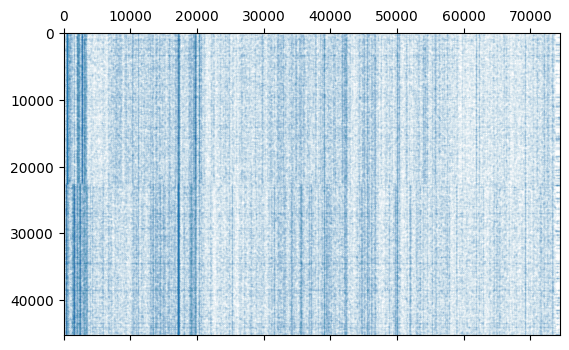

In [ ]:

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cv)

#X_test_tfidf = tfidf_transformer.fit_transform(X_test_cv)

print(X_train_tfidf)
plt.spy(X_train_tfidf, markersize=0.01)


In [ ]:
# train rains a Multinomial Naive Bayes (MNB)
clf = MultinomialNB().fit(X_train_tfidf, X_train.sentiment)

X_test_cv = count_vect.transform(X_test.root_extracted_content_UNTOKENIZED_TEXT)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)
predicted = clf.predict(X_test_tfidf)

print('\nClassification report:')
print(classification_report(X_test.sentiment, predicted))

accuracy = accuracy_score(X_test.sentiment, predicted)
print(':', accuracy)


Classification report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5768
           1       0.92      0.87      0.89      5752

    accuracy                           0.90     11520
   macro avg       0.90      0.90      0.90     11520
weighted avg       0.90      0.90      0.90     11520

: 0.8962673611111112


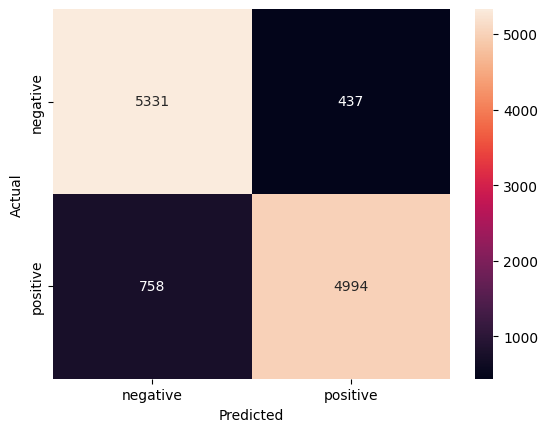

In [ ]:
conf_mat = confusion_matrix(X_test.sentiment, predicted)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model1=LogisticRegression()
model1.fit(X_train_tfidf, X_train.sentiment)

y_model1=model1.predict(X_test_tfidf)

print('\nClassification report:')
print(classification_report(X_test.sentiment,  y_model1))
accuracy = accuracy_score(X_test.sentiment, y_model1)
print('Accuracy:', accuracy)


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5768
           1       0.93      0.95      0.94      5752

    accuracy                           0.94     11520
   macro avg       0.94      0.94      0.94     11520
weighted avg       0.94      0.94      0.94     11520

Accuracy: 0.9377604166666667


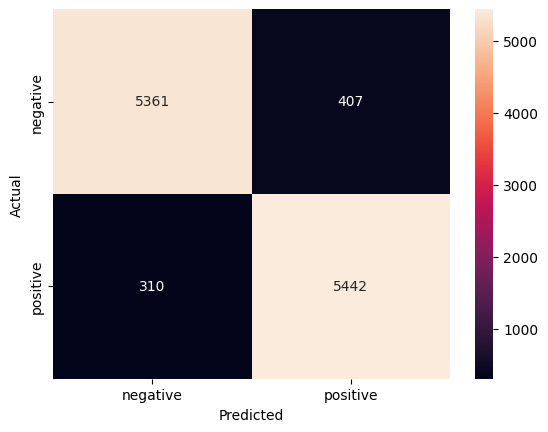

In [ ]:
conf_mat = confusion_matrix(X_test.sentiment,  y_model1)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model3=SVC(kernel='rbf')
model3.fit(X_train_tfidf, X_train.sentiment)

y_model3 = model3.predict(X_test_tfidf)



print('\nClassification report:')
print(classification_report(X_test.sentiment,  y_model3))
accuracy = accuracy_score(X_test.sentiment, y_model3)
print('Accuracy:', accuracy)


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5768
           1       0.94      0.96      0.95      5752

    accuracy                           0.95     11520
   macro avg       0.95      0.95      0.95     11520
weighted avg       0.95      0.95      0.95     11520

Accuracy: 0.9453125


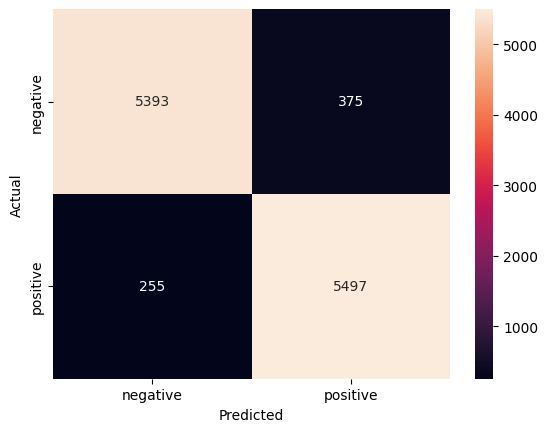

In [ ]:
conf_mat = confusion_matrix(X_test.sentiment,  y_model3)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()